In [74]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import random

import math
import time

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import StrMethodFormatter
from matplotlib.ticker import ScalarFormatter

import json

In [75]:
# Define Tableau 10 Colors
tableau_colors = [
    (31, 119, 180),  # Blue 0
    (255, 127, 14),  # Orange 1
    (44, 160, 44),   # Green 2
    (214, 39, 40),   # Red 3
    (148, 103, 189), # Purple 4 
    (140, 86, 75),   # Brown 5
    (227, 119, 194), # Pink 6
    (127, 127, 127), # Gray 7
    (188, 189, 34),  # Yellow 8
    (23, 190, 207),  # Cyan 9
]

# Normalize RGB values to range [0, 1]
tableau_colors = [(r / 255, g / 255, b / 255) for r, g, b in tableau_colors]

font = {'family': 'Georgia', 'color':  'black', 'weight': 'normal', 'size': 20}
title_font = {'family': 'Georgia', 'color':  'black', 'weight': 'bold', 'style': 'italic', 'size': 20}
suptitle_font = FontProperties(family='Georgia', weight='bold', size=22)
legend_font = FontProperties(family='Georgia', weight='normal', size=16)
tick_font = {'family': 'Georgia', 'size': 18}

## Single-layer Perceptron for Assignment Logic

In [3]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def sigmoid_deriv(x):
    return np.exp(-x) / (1.0 + np.exp(-x)) ** 2.0
    
def tanh(x):
    return np.tanh(x)

def tanh_deriv(x):
    return 4.0 / (np.exp(x) + np.exp(-x)) ** 2.0

In [4]:
# hyperparameters
n_epochs = 100000 # number of learning epochs
suffices = ['_original','_expand', '_scramble']
transfer_functions = ['sigmoid', 'tanh']
learning_rates = [0.01, 0.1, 1.0, 10, 100]

In [5]:
# training and testing data sets 
# original equivalence
X_train_original = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
y_train_original = np.array([0, 0, 1, 1])

X_test_original = np.array([[0, 0, 0], [0, 1, 0], [1, 0, 0], [1, 1, 0]])
y_test_original = np.array([0, 0, 1, 1])

# expand on training set by one case, reduce test set by one case
X_train_expand = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1], [0, 0, 0]])
y_train_expand = np.array([0, 0, 1, 1, 0])
        
X_test_expand = np.array([[0, 1, 0], [1, 0, 0], [1, 1, 0]])
y_test_expand = np.array([0, 1, 1])

# scramble the cases but keep the number of cases the same as original 
X_train_scramble = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 0, 0]])
y_train_scramble = np.array([0, 0, 1, 1])

X_test_scramble = np.array([[0, 0, 0], [0, 1, 0], [1, 1, 1], [1, 1, 0]])
y_test_scramble = np.array([0, 0, 1, 1])


In [6]:
# single-layer perceptron training
def train_perceptron(X_train, y_train, transfer_function='sigmoid', learning_rate=1.0, \
                     epochs=n_epochs):
    """    
    Train a perceptron using a specified transfer function, and learning rate
    
    Parameters:
    - X_train (numpy array): Input training data.
    - y_train (numpy array): Target training data.
    - transfer_function (str): Transfer function for activation.
    - learning_rate (float): Learning rate for weight updates.
    - epochs (int): Number of training epochs.
    
    Returns:
    - weights (numpy array): Trained weights.
    - train_errors (numpy array): Array of training errors averaged over training cases
    during training.
    """
    
    weights = np.random.rand(X_train.shape[1]) 
    train_errors = np.zeros(epochs)
    
    start_time = time.process_time()
    for epoch in range(epochs):
        net_input = np.dot(weights, X_train.T)
        if transfer_function == 'tanh':
            y_pred = tanh(net_input)
            gradient_weights = 2 * np.dot((y_pred - y_train) * tanh_deriv(net_input), X_train) / len(y_train) 
        elif transfer_function == 'sigmoid':
            y_pred = sigmoid(net_input)
            gradient_weights = 2 * np.dot((y_pred - y_train) * sigmoid_deriv(net_input), X_train) / len(y_train) 
        train_error = np.sum((y_train - y_pred) ** 2) / len(y_train)    
        weights += - learning_rate * gradient_weights
        train_errors[epoch] = train_error
    
    end_time = time.process_time()
    train_time = end_time - start_time
    
    return weights, train_errors, train_time


In [7]:
def test_perceptron(X_test, y_test, weights, transfer_function='sigmoid'):
    """    
    Test a perceptron using trained weights, and a specified transfer function
    
    Parameters:
    - X_test (numpy array): Input test data (numpy array).
    - y_test (numpy array): Target test data (numpy array).
    - transfer_function (str): Transfer function for activation.
    
    Returns:
    - y_pred (numpy array): Predicted output data.
    - test_error (float): Test error averaged over test cases.
    """
    
    net_input = np.dot(weights, X_test.T)
    if transfer_function == 'tanh':
        y_pred = tanh(net_input)
    elif transfer_function == 'sigmoid':
        y_pred = sigmoid(net_input)
    test_error = np.sum((y_test - y_pred) ** 2) / len(y_test)
    return y_pred, test_error
    

In [8]:
def store_train_test(X_train, y_train, X_test, y_test, 
                          transfer_functions, learning_rates, epochs=n_epochs):
    """    
    Train and test a perceptron using trained weights, and store relevant data
    """
    perceptron_dataset = []
    
    for transfer_function in transfer_functions:
        for learning_rate in learning_rates:
            weights, train_errors, train_time = train_perceptron(X_train, y_train,
                                    transfer_function, learning_rate, epochs)
            y_pred, test_error = test_perceptron(X_test, y_test, weights, transfer_function)
            
            perceptron_dict = {
                'transfer_function': transfer_function,
                'learning_rate': learning_rate,
                'weights': weights,
                'train_errors': train_errors,
                'train_time': train_time,
                'test_prediction': y_pred,
                'test_error': test_error
            }

            perceptron_dataset.append(perceptron_dict)
    return perceptron_dataset

In [12]:
# store data
perceptron_dataset_original = store_train_test(X_train_original, y_train_original, 
                                    X_test_original, y_test_original, 
                                    transfer_functions, learning_rates, n_epochs)
perceptron_dataset_expand = store_train_test(X_train_expand, y_train_expand, 
                                    X_test_expand, y_test_expand, 
                                    transfer_functions, learning_rates, n_epochs)
perceptron_dataset_scramble = store_train_test(X_train_scramble, y_train_scramble, 
                                    X_test_scramble, y_test_scramble, 
                                    transfer_functions, learning_rates, n_epochs)

In [13]:
def plot_train_data(perceptron_dataset, suffix=''):
    """    
    Plot training error for various hyperparameters as a function of epoch.
    """
    style_sigmoid = {'str': 's', 'style':  '-', 'color': tableau_colors[9]}
    style_tanh = {'str': 'tanh', 'style':  '--', 'color': tableau_colors[3]}
    style_dict = {'sigmoid': style_sigmoid, 'tanh': style_tanh}
    
    fig = plt.figure(figsize=(10, 8))
    ax = plt.gca()

    # training plot
    for perceptron_data in perceptron_dataset:
        ax.loglog(perceptron_data['train_errors'],
                  label=style_dict[perceptron_data['transfer_function']]['str'] \
                       + ', ' + str(perceptron_data['learning_rate']),
                  linestyle=style_dict[perceptron_data['transfer_function']]['style'],
                  linewidth=np.log10(perceptron_data['learning_rate']) + 3,
                  color=style_dict[perceptron_data['transfer_function']]['color'],
                  alpha=0.8)

    ax.set_ylim(1e-8, 1e1)
    ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
    ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
    ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
    ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
    # ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.1f}'))
    
    ax.set_xlabel('Epoch', fontdict=font)
    ax.set_ylabel('Training Error (MSE)', fontdict=font)
    ax.legend(loc='lower left', prop=legend_font)
    
    plt.title('Training Error vs. Epoch (log-log), ' + suffix,
                 fontproperties=suptitle_font, y=0.93)
    plt.gcf().set_facecolor('white')

    # Show the plot
    plt.savefig('./plots/train_' + suffix + '.png')
    plt.show()


/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1359/2567063083.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1359/2567063083.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


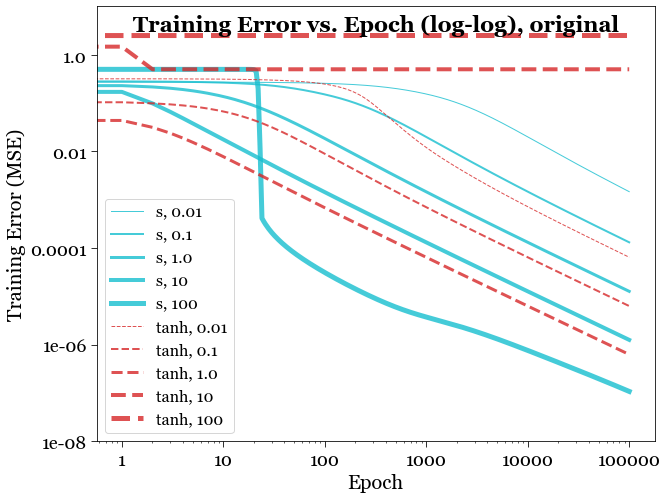

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1359/2567063083.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1359/2567063083.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


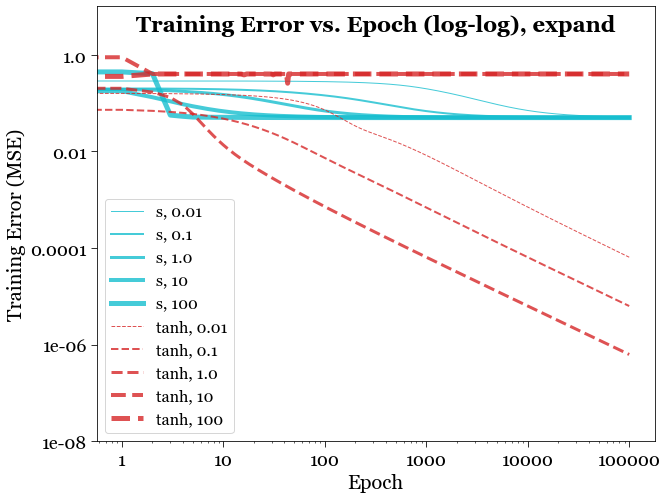

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1359/2567063083.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1359/2567063083.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


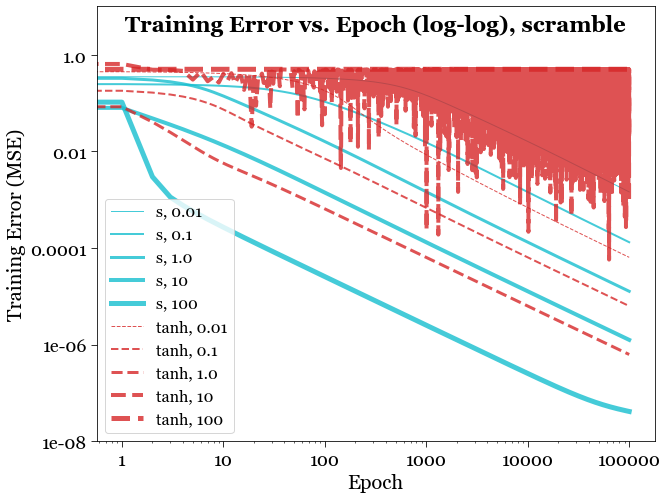

In [14]:
plot_train_data(perceptron_dataset_original, 'original')
plot_train_data(perceptron_dataset_expand, 'expand')
plot_train_data(perceptron_dataset_scramble, 'scramble')

In [23]:
# identify best training hyperparameters
best_train_params_original = {'sigmoid': 100, 'tanh': 1.0}
best_train_params_expand = {'sigmoid': 100, 'tanh': 1.0}
best_train_params_scramble = {'sigmoid': 100, 'tanh': 1.0}

In [28]:
def plot_test_data(perceptron_dataset, best_train_params, y_test, suffix):
    """
    Plot prediction and desired test results for test cases
    """
    for perceptron_data in perceptron_dataset:
        if ((perceptron_data['transfer_function'] == 'sigmoid') and
            (perceptron_data['learning_rate'] == best_train_params['sigmoid'])):
            y_pred_sigmoid = perceptron_data['test_prediction']
        elif ((perceptron_data['transfer_function'] == 'tanh') and
            (perceptron_data['learning_rate'] == best_train_params['tanh'])):
            y_pred_tanh = perceptron_data['test_prediction']
    
    x_inds = list(range(1, len(y_test) + 1))
    fig = plt.figure(figsize=(10, 6))
    ax = plt.gca()

    # Create a side-by-side bar chart
    ax.scatter(x_inds, y_test,
                marker='x', color=tableau_colors[7], s=200,
                alpha=1, label='desired output')
    ax.scatter(x_inds, y_pred_sigmoid,
                marker='s', color=tableau_colors[9], s=40,
                alpha=1, label='sigmoid prediction')
    ax.scatter(x_inds, y_pred_tanh,
                marker='o', color=tableau_colors[3], s=40,
                alpha=1, label='tanh prediction')
    # Customize tick sizes
    ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
    # ax.set_ylim(0, 750)
    ax.set_xticks([1, 2, 3, 4])
    ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
    ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
    ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.1f}'))

    # Customize the plot (optional)
    plt.xlabel('Test Case Index', fontdict=font)
    plt.ylabel('Predicted and Desired Value', fontdict=font)
    plt.gcf().set_facecolor('white')
    fig.suptitle('Test Performance, Equivalence Logic, ' + suffix, fontproperties=suptitle_font, y=0.93)
    # plt.xticks(x, categories)
    plt.legend(loc='center right', prop=legend_font)

    # Show the plot
    plt.savefig('./plots/test_' + suffix + '.png')
    plt.show()

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1359/2230271865.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


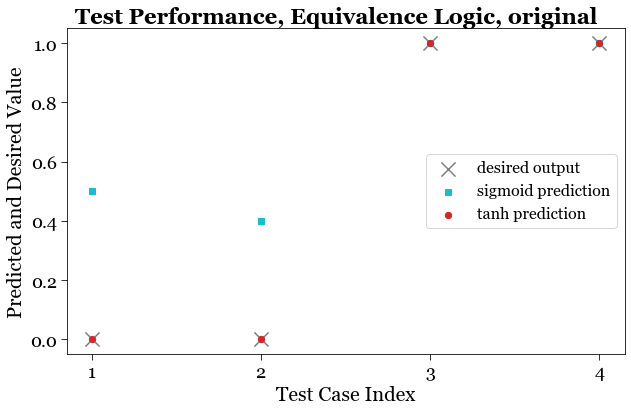

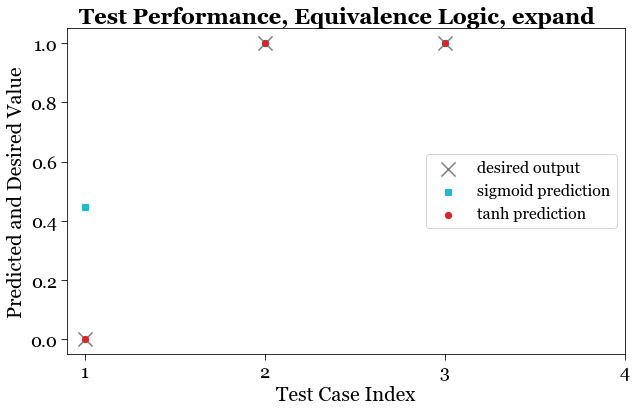

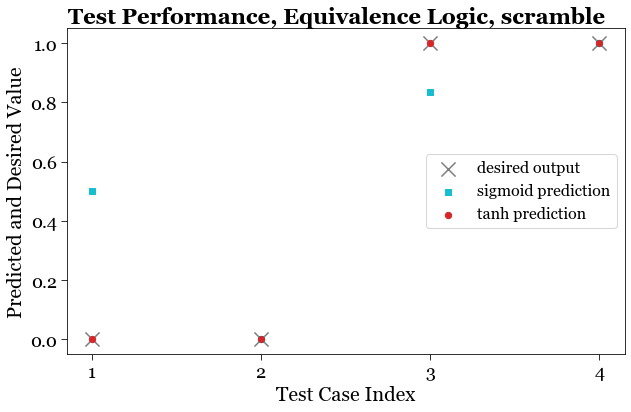

In [29]:
plot_test_data(perceptron_dataset_original, best_train_params_original, 
               y_test_original, 'original')
plot_test_data(perceptron_dataset_expand, best_train_params_expand, 
               y_test_expand, 'expand')
plot_test_data(perceptron_dataset_scramble, best_train_params_scramble, 
               y_test_scramble, 'scramble')

## Two-layer Perceptron for XOR Logic

In [142]:
# training and testing data sets 
# original equivalence
X_train_XOR_original = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
y_train_XOR_original = np.array([[0, 1, 1, 0]]).T

X_test_XOR_original = np.array([[0, 0, 0], [0, 1, 0], [1, 0, 0], [1, 1, 0]])
y_test_XOR_original = np.array([[0, 1, 1, 0]]).T

# expand on training set by one case, reduce test set by one case
X_train_XOR_expand = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1], [0, 0, 0]])
y_train_XOR_expand = np.array([[0, 1, 1, 0, 0]]).T
        
X_test_XOR_expand = np.array([[0, 1, 0], [1, 0, 0], [1, 1, 0]])
y_test_XOR_expand = np.array([[1, 1, 0]]).T

# scramble the cases but keep the number of cases the same as original 
X_train_XOR_scramble = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 0, 0]])
y_train_XOR_scramble = np.array([[0, 1, 1, 1]]).T

X_test_XOR_scramble = np.array([[0, 0, 0], [0, 1, 0], [1, 1, 1], [1, 1, 0]])
y_test_XOR_scramble = np.array([[0, 1, 0, 0]]).T


In [146]:
def transfer(x, transfer_function):
    """
    Returns activation or derivative of input, given the type of nonlinear function used
    """
    if transfer_function == 'tanh':
        func = np.tanh(x)
        deriv = 4.0 / (np.exp(x) + np.exp(-x)) ** 2.0
    if transfer_function == 'sigmoid':
        func = 1.0 / (1.0 + np.exp(-x))
        deriv = np.exp(-x) / (1.0 + np.exp(-x)) ** 2.0
    return {'func': func, 'deriv': deriv}


In [149]:
# two-layer perceptron
def train_perceptron_2l(X_train, y_train, n_hidden=4, transfer_function='sigmoid', learning_rate=1.0, \
                     epochs=n_epochs):
    """    
    Train a two-layer perceptron using a specified transfer function, and learning rate.
    The shape of weight matrices are adapted to the new shape of y_train.
    """
    weights_l1 = np.random.rand(X_train.shape[1], n_hidden) # inputs to hidden
    weights_l2 = np.random.rand(n_hidden, 1) # hidden to output
    train_errors = np.zeros(epochs)
    
    start_time = time.process_time()
    
    for epoch in range(epochs):
        net_input_l1 = np.dot(X_train, weights_l1) # weighted sum to hidden neurons
        activation_l1 = transfer(net_input_l1, transfer_function)['func']
        net_input_l2 = np.dot(activation_l1, weights_l2)
        y_pred = transfer(net_input_l2, transfer_function)['func']
        
        gradient_weights_l2 = 2.0 / y_train.shape[0] \
                            * np.dot(activation_l1.T, 
                            (y_pred - y_train) 
                            * transfer(net_input_l2, transfer_function)['deriv'])
        
        gradient_weights_l1 = 2.0 / y_train.shape[0] \
                            * np.dot(X_train.T, 
                            (y_pred - y_train)
                            * transfer(net_input_l2, transfer_function)['deriv']
                            * transfer(net_input_l1, transfer_function)['deriv']
                            * weights_l2.T)
        
        train_error = np.sum((y_train - y_pred) ** 2) / len(y_train)    
        weights_l1 += - learning_rate * gradient_weights_l1
        weights_l2 += - learning_rate * gradient_weights_l2
        
        train_errors[epoch] = train_error
    
    end_time = time.process_time()
    train_time = end_time - start_time
    
    return weights_l1, weights_l2, train_errors, train_time


In [152]:
def test_perceptron_2l(X_test, y_test, weights_l1, weights_l2, transfer_function='sigmoid'):
    """    
    Test a perceptron using trained weights, and a specified transfer function
    """
    net_input_l1 = np.dot(X_test, weights_l1) # weighted sum to hidden neurons
    activation_l1 = transfer(net_input_l1, transfer_function)['func']
    net_input_l2 = np.dot(activation_l1, weights_l2)
    y_pred = transfer(net_input_l2, transfer_function)['func']
        
    test_error = np.sum((y_test - y_pred) ** 2) / len(y_test)
    
    return y_pred, test_error
    

In [158]:
def store_train_test_2l(X_train, y_train, X_test, y_test, n_hidden,
                          transfer_functions, learning_rates, epochs=n_epochs):
    """    
    Train and test a perceptron using trained weights, and store relevant data
    """
    perceptron_dataset = []
    
    for transfer_function in transfer_functions:
        for learning_rate in learning_rates:
            weights_l1, weights_l2, train_errors, train_time = train_perceptron_2l(
                        X_train, y_train, n_hidden, 
                        transfer_function, learning_rate, epochs)
            y_pred, test_error = test_perceptron_2l(
                        X_test, y_test, weights_l1, weights_l2, transfer_function)
            
            perceptron_dict = {
                'transfer_function': transfer_function,
                'learning_rate': learning_rate,
                'weights_l1': weights_l1,
                'weights_l2': weights_l2,
                'train_errors': train_errors,
                'train_time': train_time,
                'test_prediction': y_pred,
                'test_error': test_error
            }

            perceptron_dataset.append(perceptron_dict)
    return perceptron_dataset

In [159]:
# data taking
n_hidden = 4
perceptron_dataset_XOR_original = store_train_test_2l(
                                    X_train_XOR_original, y_train_XOR_original, 
                                    X_test_XOR_original, y_test_XOR_original, n_hidden,
                                    transfer_functions, learning_rates, n_epochs)
perceptron_dataset_XOR_expand   = store_train_test_2l(
                                    X_train_XOR_expand, y_train_XOR_expand, 
                                    X_test_XOR_expand, y_test_XOR_expand, n_hidden,
                                    transfer_functions, learning_rates, n_epochs)
perceptron_dataset_XOR_scramble = store_train_test_2l(
                                    X_train_XOR_scramble, y_train_XOR_scramble, 
                                    X_test_XOR_scramble, y_test_XOR_scramble, n_hidden,
                                    transfer_functions, learning_rates, n_epochs)


In [162]:
# Save to a NumPy binary file
np.save('XOR_original.npy', perceptron_dataset_XOR_original)
np.save('XOR_expand.npy', perceptron_dataset_XOR_expand)
np.save('XOR_scramble.npy', perceptron_dataset_XOR_scramble)

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1359/2567063083.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1359/2567063083.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


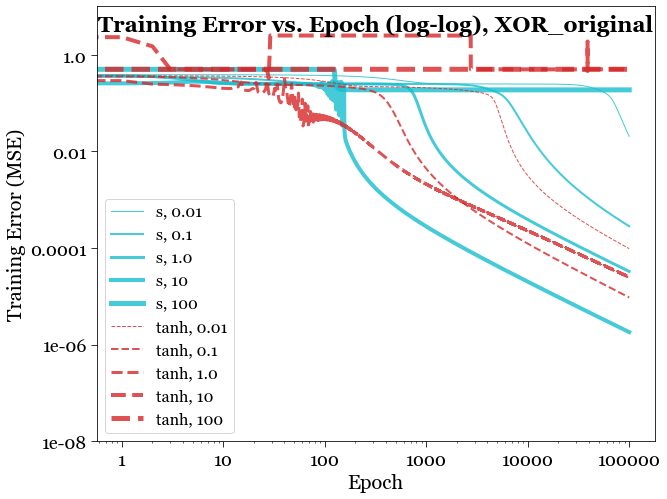

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1359/2567063083.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1359/2567063083.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


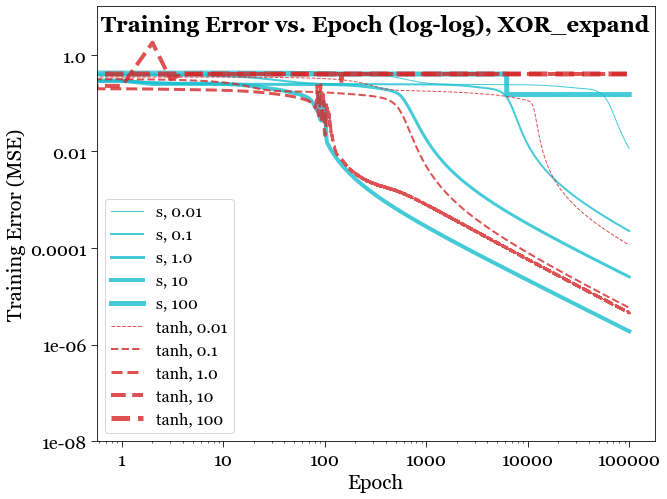

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1359/2567063083.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1359/2567063083.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


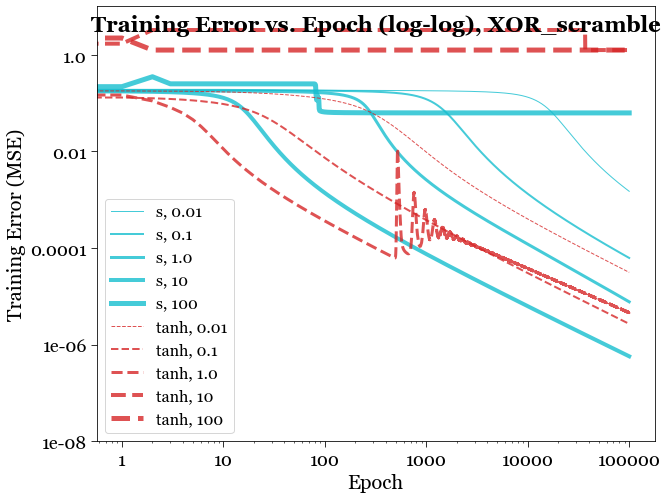

In [163]:
plot_train_data(perceptron_dataset_XOR_original, 'XOR_original')
plot_train_data(perceptron_dataset_XOR_expand, 'XOR_expand')
plot_train_data(perceptron_dataset_XOR_scramble, 'XOR_scramble')

In [164]:
best_train_params_XOR_original =  {'sigmoid': 10, 'tanh': 0.1}
best_train_params_XOR_expand   =  {'sigmoid': 10, 'tanh': 1.0}
best_train_params_XOR_scramble =  {'sigmoid': 10, 'tanh': 0.1}

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1359/2230271865.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


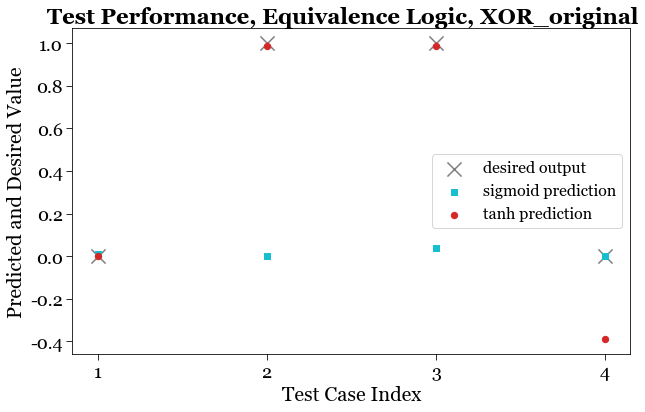

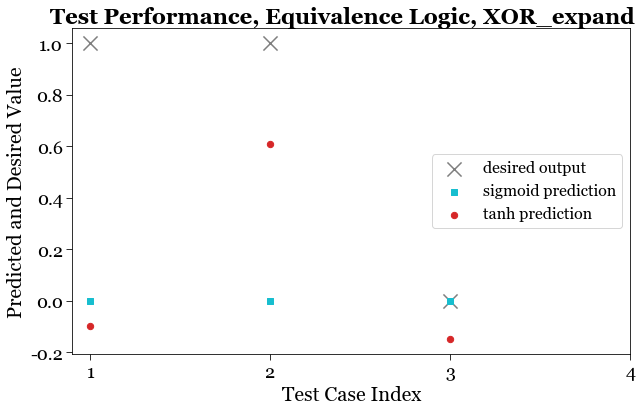

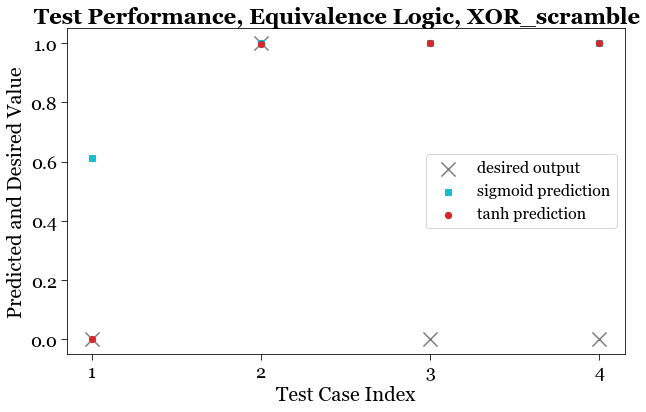

In [165]:
plot_test_data(perceptron_dataset_XOR_original, best_train_params_XOR_original, 
               y_test_XOR_original, 'XOR_original')
plot_test_data(perceptron_dataset_XOR_expand, best_train_params_XOR_expand, 
               y_test_XOR_expand, 'XOR_expand')
plot_test_data(perceptron_dataset_XOR_scramble, best_train_params_XOR_scramble, 
               y_test_XOR_scramble, 'XOR_scramble')

In [160]:
perceptron_dataset_XOR_original

[{'transfer_function': 'sigmoid',
  'learning_rate': 0.01,
  'weights_l1': array([[ 0.12620399,  5.35724524,  4.01243632,  1.10308673],
         [ 2.6925746 ,  4.95847221, -2.09727699,  2.29646694],
         [-1.36618255, -1.5197851 ,  0.79144014, -2.36798691]]),
  'weights_l2': array([[-3.01029689],
         [ 6.96289592],
         [-3.72577141],
         [-3.52127605]]),
  'train_errors': array([0.38726967, 0.38712871, 0.38698756, ..., 0.02052435, 0.02052347,
         0.02052258]),
  'train_time': 7.652391000000023,
  'test_prediction': array([[0.16148446],
         [0.61965754],
         [0.27423257],
         [0.07357843]]),
  'test_error': 0.17572244377728816},
 {'transfer_function': 'sigmoid',
  'learning_rate': 0.1,
  'weights_l1': array([[-1.48480078,  2.56238946,  5.84134651,  6.7854119 ],
         [ 5.93257336,  2.12039742, -2.99967753,  6.72925685],
         [-1.04549161, -3.5636445 ,  0.57683458, -2.1666029 ]]),
  'weights_l2': array([[-6.79555582],
         [-4.38771295],


## Multi-layer Perceptron for MNIST data

In [63]:
"""
A module to implement the stochastic gradient descent learning
algorithm for a feedforward neural network.  Gradients are calculated
using backpropagation.  Note that I have focused on making the code
simple, easily readable, and easily modifiable.  It is not optimized,
and omits many desirable features.
"""

#### Libraries
# Standard library
import random

# Third-party libraries
import numpy as np

class Network(object):

    def __init__(self, sizes):
        """The list ``sizes`` contains the number of neurons in the
        respective layers of the network.  For example, if the list
        was [2, 3, 1] then it would be a three-layer network, with the
        first layer containing 2 neurons, the second layer 3 neurons,
        and the third layer 1 neuron.  The biases and weights for the
        network are initialized randomly, using a Gaussian
        distribution with mean 0, and variance 1.  Note that the first
        layer is assumed to be an input layer, and by convention we
        won't set any biases for those neurons, since biases are only
        ever used in computing the outputs from later layers."""
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in list(zip(sizes[:-1], sizes[1:]))]
        self.successes = []

    def feedforward(self, a):
        """Return the output of the network if ``a`` is input."""
        for b, w in list(zip(self.biases, self.weights)):
            a = sigmoid(np.dot(w, a)+b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta,
            test_data=None):
        """Train the neural network using mini-batch stochastic
        gradient descent.  The ``training_data`` is a list of tuples
        ``(x, y)`` representing the training inputs and the desired
        outputs.  The other non-optional parameters are
        self-explanatory.  If ``test_data`` is provided then the
        network will be evaluated against the test data after each
        epoch, and partial progress printed out.  This is useful for
        tracking progress, but slows things down substantially."""
        if test_data: n_test = len(test_data)
        n = len(training_data)
        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                print("Epoch {0}: {1} / {2}".format(
                    j, self.evaluate(test_data), n_test))
                self.successes.append(self.evaluate(test_data))
            else:
                print("Epoch {0} complete".format(j))

    def update_mini_batch(self, mini_batch, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
        is the learning rate."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in list(zip(nabla_b, delta_nabla_b))]
            nabla_w = [nw+dnw for nw, dnw in list(zip(nabla_w, delta_nabla_w))]
        self.weights = [w-(eta/len(mini_batch))*nw
                        for w, nw in list(zip(self.weights, nabla_w))]
        self.biases = [b-(eta/len(mini_batch))*nb
                       for b, nb in list(zip(self.biases, nabla_b))]

    def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in list(zip(self.biases, self.weights)):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * \
            sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

    def evaluate(self, test_data):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        test_results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations-y)

#### Miscellaneous functions
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

In [56]:
"""
mnist_loader
~~~~~~~~~~~~

A library to load the MNIST image data.  For details of the data
structures that are returned, see the doc strings for ``load_data``
and ``load_data_wrapper``.  In practice, ``load_data_wrapper`` is the
function usually called by our neural network code.
"""

#### Libraries
# Standard library
import pickle
import gzip

def load_data():
    """Return the MNIST data as a tuple containing the training data,
    the validation data, and the test data.

    The ``training_data`` is returned as a tuple with two entries.
    The first entry contains the actual training images.  This is a
    numpy ndarray with 50,000 entries.  Each entry is, in turn, a
    numpy ndarray with 784 values, representing the 28 * 28 = 784
    pixels in a single MNIST image.

    The second entry in the ``training_data`` tuple is a numpy ndarray
    containing 50,000 entries.  Those entries are just the digit
    values (0...9) for the corresponding images contained in the first
    entry of the tuple.

    The ``validation_data`` and ``test_data`` are similar, except
    each contains only 10,000 images.

    This is a nice data format, but for use in neural networks it's
    helpful to modify the format of the ``training_data`` a little.
    That's done in the wrapper function ``load_data_wrapper()``, see
    below.
    """
    f = gzip.open('./neural-networks-and-deep-learning/data/mnist.pkl.gz', 'rb')
    training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
    f.close()
    return (training_data, validation_data, test_data)

def load_data_wrapper():
    """Return a tuple containing ``(training_data, validation_data,
    test_data)``. Based on ``load_data``, but the format is more
    convenient for use in our implementation of neural networks.

    In particular, ``training_data`` is a list containing 50,000
    2-tuples ``(x, y)``.  ``x`` is a 784-dimensional numpy.ndarray
    containing the input image.  ``y`` is a 10-dimensional
    numpy.ndarray representing the unit vector corresponding to the
    correct digit for ``x``.

    ``validation_data`` and ``test_data`` are lists containing 10,000
    2-tuples ``(x, y)``.  In each case, ``x`` is a 784-dimensional
    numpy.ndarry containing the input image, and ``y`` is the
    corresponding classification, i.e., the digit values (integers)
    corresponding to ``x``.

    Obviously, this means we're using slightly different formats for
    the training data and the validation / test data.  These formats
    turn out to be the most convenient for use in our neural network
    code."""
    tr_d, va_d, te_d = load_data()
    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    training_data = list(zip(training_inputs, training_results))
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = list(zip(validation_inputs, va_d[1]))
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_data = list(zip(test_inputs, te_d[1]))
    return (training_data, validation_data, test_data)

def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere.  This is used to convert a digit
    (0...9) into a corresponding desired output from the neural
    network."""
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

In [46]:
training_data, validation_data, test_data = load_data_wrapper()

In [66]:
# original
net1 = Network([784, 30, 10])
net1.SGD(training_data, 30, 10, 3.0, test_data=test_data)
successes1 = net1.successes

Epoch 0: 8987 / 10000
Epoch 1: 9243 / 10000
Epoch 2: 9314 / 10000
Epoch 3: 9353 / 10000
Epoch 4: 9387 / 10000
Epoch 5: 9397 / 10000
Epoch 6: 9402 / 10000
Epoch 7: 9436 / 10000
Epoch 8: 9438 / 10000
Epoch 9: 9462 / 10000
Epoch 10: 9412 / 10000
Epoch 11: 9454 / 10000
Epoch 12: 9490 / 10000
Epoch 13: 9484 / 10000
Epoch 14: 9486 / 10000
Epoch 15: 9465 / 10000
Epoch 16: 9487 / 10000
Epoch 17: 9488 / 10000
Epoch 18: 9494 / 10000
Epoch 19: 9491 / 10000
Epoch 20: 9489 / 10000
Epoch 21: 9497 / 10000
Epoch 22: 9499 / 10000
Epoch 23: 9503 / 10000
Epoch 24: 9496 / 10000
Epoch 25: 9525 / 10000
Epoch 26: 9507 / 10000
Epoch 27: 9502 / 10000
Epoch 28: 9499 / 10000
Epoch 29: 9496 / 10000


In [67]:
# lots of hidden neurons
net2 = Network([784, 100, 10])
net2.SGD(training_data, 30, 10, 3.0, test_data=test_data)
successes2 = net2.successes

Epoch 0: 8320 / 10000
Epoch 1: 8433 / 10000
Epoch 2: 8503 / 10000
Epoch 3: 8499 / 10000
Epoch 4: 8555 / 10000
Epoch 5: 9232 / 10000
Epoch 6: 9538 / 10000
Epoch 7: 9566 / 10000
Epoch 8: 9590 / 10000
Epoch 9: 9569 / 10000
Epoch 10: 9607 / 10000
Epoch 11: 9595 / 10000
Epoch 12: 9632 / 10000
Epoch 13: 9607 / 10000
Epoch 14: 9623 / 10000
Epoch 15: 9626 / 10000
Epoch 16: 9626 / 10000
Epoch 17: 9643 / 10000
Epoch 18: 9637 / 10000
Epoch 19: 9640 / 10000
Epoch 20: 9639 / 10000
Epoch 21: 9657 / 10000
Epoch 22: 9667 / 10000
Epoch 23: 9667 / 10000
Epoch 24: 9657 / 10000
Epoch 25: 9661 / 10000
Epoch 26: 9665 / 10000
Epoch 27: 9664 / 10000
Epoch 28: 9653 / 10000
Epoch 29: 9672 / 10000


In [68]:
# no hidden layer
net3 = Network([784, 10])
net3.SGD(training_data, 30, 10, 3.0, test_data=test_data)
successes3 = net3.successes

Epoch 0: 5666 / 10000
Epoch 1: 6615 / 10000
Epoch 2: 7452 / 10000
Epoch 3: 7415 / 10000
Epoch 4: 7498 / 10000
Epoch 5: 7482 / 10000
Epoch 6: 7456 / 10000
Epoch 7: 7497 / 10000
Epoch 8: 7467 / 10000
Epoch 9: 7494 / 10000
Epoch 10: 7468 / 10000
Epoch 11: 7495 / 10000
Epoch 12: 7509 / 10000
Epoch 13: 7487 / 10000
Epoch 14: 7507 / 10000
Epoch 15: 7491 / 10000
Epoch 16: 7514 / 10000
Epoch 17: 7505 / 10000
Epoch 18: 7492 / 10000
Epoch 19: 7506 / 10000
Epoch 20: 7495 / 10000
Epoch 21: 7509 / 10000
Epoch 22: 7494 / 10000
Epoch 23: 7514 / 10000
Epoch 24: 7507 / 10000
Epoch 25: 7513 / 10000
Epoch 26: 7517 / 10000
Epoch 27: 7509 / 10000
Epoch 28: 7508 / 10000
Epoch 29: 7527 / 10000


/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1363/286920317.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1363/286920317.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


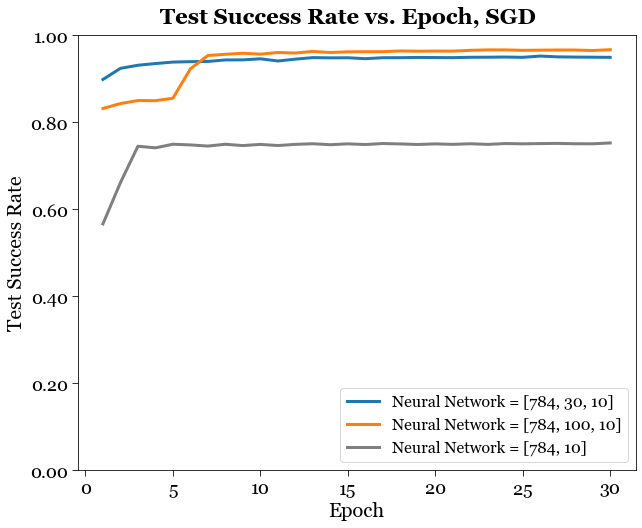

In [86]:
# plot all three cases together.
fig = plt.figure(figsize=(10, 8))
ax = plt.gca()

epochs = list(range(1, len(successes1) + 1))

# try line plot for shaded error region
ax.plot(epochs, [s1/10000 for s1 in successes1], \
            color=tableau_colors[0], linewidth=3.0, \
            alpha=1, label='Neural Network = [784, 30, 10]')
ax.plot(epochs, [s2/10000 for s2 in successes2], \
            color=tableau_colors[1], linewidth=3.0, \
            alpha=1, label='Neural Network = [784, 100, 10]')
ax.plot(epochs, [s3/10000 for s3 in successes3], \
            color=tableau_colors[7], linewidth=3.0, \
            alpha=1, label='Neural Network = [784, 10]')

# Customize tick sizes
ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
ax.set_ylim(0, 1)
ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.2f}'))

# Customize the plot (optional)
plt.xlabel('Epoch', fontdict=font)
plt.ylabel('Test Success Rate', fontdict=font)
plt.gcf().set_facecolor('white')
fig.suptitle('Test Success Rate vs. Epoch, SGD', fontproperties=suptitle_font, y=0.93)
# plt.xticks(x, categories)
plt.legend(loc='lower right', prop=legend_font)

# Show the plot
plt.savefig('../plots/MNIST.png')
plt.show()